### Out Migrators w/ No Family Income
*Does not apply PERWT

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
outmigrators = pd.read_csv('ipums_clean.csv')

In [3]:
#Removing records with missing rent or mortgage values (assigned the value 0)
#Removing records with missing individual and/or family income values (assigned the value 9999999)
#Only keeping records of individuals who do not have family incomes
out_rent_inc = outmigrators[(outmigrators.RENT != 0) & (outmigrators.INCTOT != 9999999) & (outmigrators.FTOTINC != 9999999) & (outmigrators.INCTOT >= outmigrators.FTOTINC)]

---

### (1) Income:

In [4]:
ind_outmigrators_income = {}
for year in range(2006, 2018):
    df = out_rent_inc[out_rent_inc.YEAR == year]
    income = df.INCTOT.median()
    ind_outmigrators_income[year] = income

In [5]:
ind_outmigrators_income

{2006: 19500.0,
 2007: 26100.0,
 2008: 25000.0,
 2009: 21000.0,
 2010: 21050.0,
 2011: 20000.0,
 2012: 20000.0,
 2013: 23000.0,
 2014: 21850.0,
 2015: 22000.0,
 2016: 23000.0,
 2017: 26000.0}

In [6]:
out_ind_income_df = pd.DataFrame.from_dict(ind_outmigrators_income, orient='index')
out_ind_income_df = out_ind_income_df.reset_index().rename({'index':'Year', 0:'Med_Income'}, axis=1)

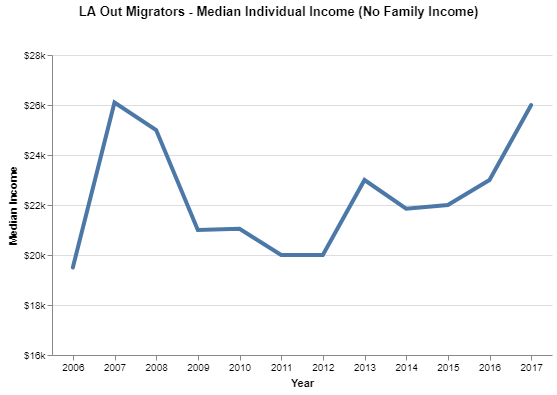

In [7]:
#Plotting w/ Altair
title=alt.TitleParams(text='LA Out Migrators - Median Individual Income (No Family Income)', offset=30, anchor='middle')

indiv_income = alt.Chart(out_ind_income_df).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            axis=alt.Axis(grid=False), 
            title='Year'),
    y=alt.Y('Med_Income', 
            scale=alt.Scale(domain=[16000, 28000]), 
            axis=alt.Axis(format='$s'), 
            title='Median Income')
).properties(title=title, 
             width=500, 
             background='white'
).configure_view(strokeWidth=0)

indiv_income

In [8]:
indiv_income.save('out_med_inc_no_perwt_no_fam.png', scale_factor=3)

----------

### (2) Rent % of Income:

Rent:

In [11]:
ind_outmigrators_rent = {}
for year in range(2006, 2018):
    df = out_rent_inc[out_rent_inc.YEAR == year]
    rent = df.RENT.median()
    ind_outmigrators_rent[year] = rent

In [12]:
ind_outmigrators_rent

{2006: 930.0,
 2007: 1000.0,
 2008: 1100.0,
 2009: 1000.0,
 2010: 1000.0,
 2011: 995.0,
 2012: 1000.0,
 2013: 1100.0,
 2014: 1200.0,
 2015: 1200.0,
 2016: 1300.0,
 2017: 1300.0}

*Note: The additional filtering out of records w/ family incomes caused these individual rent values to be different than those in other charts

----------

#### *Combining rent & income data to calculate rent-to-income ratio

In [13]:
indiv_inc_rent = out_ind_income_df.copy()
indiv_inc_rent['Med_Rent'] = ind_outmigrators_rent.values()
indiv_inc_rent['Ratio'] = indiv_inc_rent.Med_Rent / (indiv_inc_rent.Med_Income / 12)  #Div. by 12 for rent-to-income ratio to reflect monthly income
indiv_inc_rent

,Year,Med_Income,Med_Rent,Ratio
0,2006,19500.0,930.0,0.572308
1,2007,26100.0,1000.0,0.459770
2,2008,25000.0,1100.0,0.528000
3,2009,21000.0,1000.0,0.571429
4,2010,21050.0,1000.0,0.570071
5,2011,20000.0,995.0,0.597000
6,2012,20000.0,1000.0,0.600000
7,2013,23000.0,1100.0,0.573913
8,2014,21850.0,1200.0,0.659039
9,2015,22000.0,1200.0,0.654545


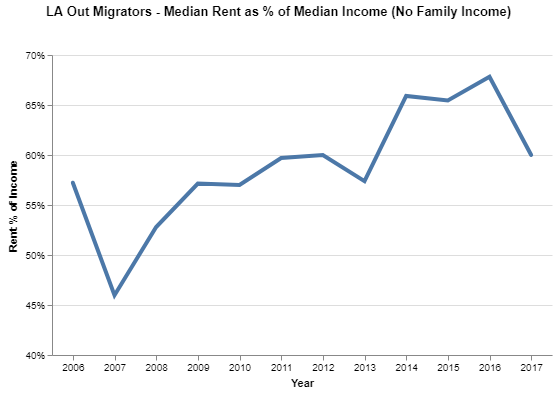

In [14]:
#Plotting with Altair
title=alt.TitleParams(text='LA Out Migrators - Median Rent as % of Median Income (No Family Income)', offset=30, anchor='middle')

indiv_rent_inc = alt.Chart(indiv_inc_rent).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            title='Year', 
            axis=alt.Axis(grid=False, 
                          labelFlush=False)), 
    y=alt.Y('Ratio', 
            title='Rent % of Income',
            axis=alt.Axis(format='%'), 
            scale=alt.Scale(domain=[.4,.7]))
).properties(title=title, 
             width=500,
             background='white'
).configure_view(strokeWidth=0)

indiv_rent_inc

In [15]:
indiv_rent_inc.save('rent_perc_indiv_inc_no_perwt_no_fam.png', scale_factor=3)

---

### (3) Rent % of Income (by Race):

Median rent for each race:

In [16]:
rent_race = pd.DataFrame()
for year in range(2006, 2018):
    df = out_rent_inc[out_rent_inc.YEAR == year]    
    races = out_rent_inc.RACE.unique()
    
    rents = {}
    for race in races:
        race_df = df[df.RACE == race]
        median = race_df.RENT.median()
        rents[race] = median
        
    #Storing race income data in dataframe
    race_df = pd.DataFrame.from_dict(rents, orient='index')
    race_df = race_df.reset_index().rename({'index':'Race', 0:'Med_Rent'}, axis=1)
    race_df['Year'] = np.full(len(race_df), year)
    
    #Appending to income_race df to contain race income data for all years
    rent_race = pd.concat([rent_race, race_df])

In [17]:
rent_race.head()

,Race,Med_Rent,Year
0,Other,940.0,2006
1,African American,820.0,2006
2,White,980.0,2006
3,Hispanic,820.0,2006
4,Asian,1000.0,2006


Median income for each race:

In [18]:
income_race = pd.DataFrame()
for year in range(2006, 2018):
    df = out_rent_inc[out_rent_inc.YEAR == year]    
    races = out_rent_inc.RACE.unique()
    
    incomes = {}
    for race in races:
        race_df = df[df.RACE == race]
        median = race_df.INCTOT.median()
        incomes[race] = median
    
    #Storing race income data in dataframe
    df = pd.DataFrame.from_dict(incomes, orient='index')
    df = df.reset_index().rename({'index':'Race', 0:'Med_Income'}, axis=1)
    df['Year'] = np.full(len(df), year)
    
    #Appending to income_race df to contain race income data for all years
    income_race = pd.concat([income_race, df])

In [19]:
income_race.head()

,Race,Med_Income,Year
0,Other,23150.0,2006
1,African American,18100.0,2006
2,White,23850.0,2006
3,Hispanic,16690.0,2006
4,Asian,15000.0,2006


Combining Rent & Income Data:

In [20]:
indiv_race_inc_rent = income_race.copy()
indiv_race_inc_rent['Med_Rent'] = rent_race['Med_Rent']
indiv_race_inc_rent['Ratio'] = indiv_race_inc_rent.Med_Rent / (indiv_race_inc_rent.Med_Income / 12)  #Div. by 12 for rent-to-income ratio to reflect monthly income

In [21]:
indiv_race_inc_rent.head()

,Race,Med_Income,Year,Med_Rent,Ratio
0,Other,23150.0,2006,940.0,0.487257
1,African American,18100.0,2006,820.0,0.543646
2,White,23850.0,2006,980.0,0.493082
3,Hispanic,16690.0,2006,820.0,0.589575
4,Asian,15000.0,2006,1000.0,0.800000


In [22]:
no_other_mixed = indiv_race_inc_rent[indiv_race_inc_rent.Race.isin(['Other', 'Mixed']) == False] 
#Values from 'Mixed' & 'Other' were significantly skewed, which is why they are excluded from the plot

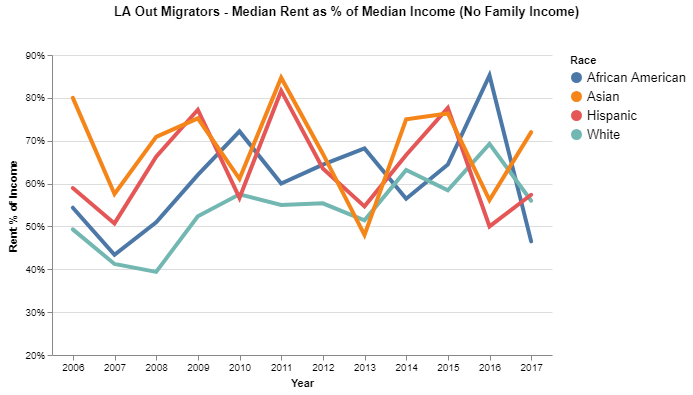

In [23]:
#Plotting with Altair
title=alt.TitleParams(text='LA Out Migrators - Median Rent as % of Median Income (No Family Income)', offset=30, anchor='middle')

indiv_race_rent_inc = alt.Chart(no_other_mixed).mark_line(strokeWidth=4, strokeCap='round').configure_axis(labelAngle=0).encode(
    x=alt.X('Year:O', 
            title='Year',
            axis=alt.Axis(grid=False)), 
    y=alt.Y('Ratio', 
            title='Rent % of Income',
            scale=alt.Scale(domain=[.2, .9]),
            axis=alt.Axis(format='%')),
    color=alt.Color('Race')
).configure_view(strokeWidth=0
).properties(
    title=title, 
    width=500, 
    background='white'
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=5.5, 
                   symbolSize=30)

indiv_race_rent_inc

In [24]:
indiv_race_rent_inc.save('rent_perc_indiv_race_inc_no_perwt_no_fam.png', scale_factor=3)